<a href="https://colab.research.google.com/github/itimes-digital/deep-learning-estudo/blob/main/serie_temporal_multi_saidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base = pd.read_csv('https://raw.githubusercontent.com/itimes-digital/deep-learning-estudo/main/dataset/petr4_treinamento.csv')
base.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0


In [4]:
base = base.dropna()

In [7]:
base_treinamento = base.iloc[:, 1:2].values
base_treinamento

array([[19.99    ],
       [19.809999],
       [20.33    ],
       ...,
       [15.99    ],
       [16.1     ],
       [16.1     ]])

In [8]:
base_valor_maximo = base.iloc[:, 2:3].values
base_valor_maximo

array([[20.209999],
       [20.4     ],
       [20.620001],
       ...,
       [16.139999],
       [16.129999],
       [16.1     ]])

In [11]:
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)
base_valor_maximo_normalizada = normalizador.fit_transform(base_valor_maximo)

In [13]:
previsores = []
preco_real_1 = []
preco_real_2 = []

for i in range(90, 1242):
  previsores.append(base_treinamento_normalizada[i - 90: i, 0]);
  preco_real_1.append(base_treinamento_normalizada[i, 0]);
  preco_real_2.append(base_valor_maximo_normalizada[i, 0]);

previsores, preco_real_1, preco_real_2 = np.array(previsores), np.array(preco_real_1), np.array(preco_real_2);

In [14]:
previsores.shape, preco_real_1.shape, preco_real_2.shape

((1152, 90), (1152,), (1152,))

In [15]:
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1));

In [16]:
previsores.shape

(1152, 90, 1)

In [17]:
preco_real = np.column_stack((preco_real_1, preco_real_2))
preco_real.shape

(1152, 2)

In [21]:
model = Sequential();

model.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 1)));
model.add(Dropout(0.3));

model.add(LSTM(units = 100, return_sequences = True));
model.add(Dropout(0.3));

model.add(LSTM(units = 50, return_sequences = True));
model.add(Dropout(0.3));

model.add(LSTM(units = 50));
model.add(Dropout(0.3));

model.add(Dense(units = 2, activation = 'linear'));

model.compile(optimizer = 'rmsprop', 
              loss = 'mean_squared_error', 
              metrics = ['mean_absolute_error']);

model.summary();

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 90, 100)           40800     
_________________________________________________________________
dropout_8 (Dropout)          (None, 90, 100)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 90, 100)           80400     
_________________________________________________________________
dropout_9 (Dropout)          (None, 90, 100)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 90, 50)            30200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 90, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)               

In [ ]:
model.fit(previsores, preco_real, epochs = 100, batch_size = 32)

In [24]:
np.mean(model.history.history['loss'])

0.0037227313418406994

In [25]:
np.mean(model.history.history['mean_absolute_error'])

0.04231813823804259

In [26]:
base_teste = pd.read_csv('https://raw.githubusercontent.com/itimes-digital/deep-learning-estudo/main/dataset/petr4_teste.csv')
base_teste.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,16.190001,16.549999,16.190001,16.549999,16.516966,33461800
1,2018-01-03,16.490000,16.719999,16.370001,16.700001,16.666668,55940900
2,2018-01-04,16.780001,16.959999,16.620001,16.730000,16.696608,37064900
3,2018-01-05,16.700001,16.860001,16.570000,16.830000,16.796408,26958200
4,2018-01-08,16.740000,17.030001,16.709999,17.030001,16.996010,28400000


In [44]:
preco_real_open = base_teste.iloc[:, 1:2].values
preco_real_high = base_teste.iloc[:, 2:3].values

In [48]:
len(base_completa), len(base_teste)

(1264, 22)

In [46]:
base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0);
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values;
entradas

array([13.93    , 13.76    , 13.79    , 13.53    , 13.85    , 13.96    ,
       14.57    , 14.65    , 15.02    , 15.1     , 14.88    , 14.98    ,
       14.94    , 15.03    , 15.07    , 15.02    , 15.1     , 15.25    ,
       15.85    , 15.6     , 15.79    , 15.86    , 15.7     , 15.37    ,
       15.5     , 15.19    , 15.6     , 15.9     , 15.88    , 15.66    ,
       15.61    , 16.129999, 16.17    , 16.08    , 16.23    , 16.16    ,
       16.139999, 16.219999, 16.      , 16.190001, 16.290001, 16.290001,
       16.530001, 16.780001, 16.77    , 16.969999, 16.9     , 16.99    ,
       16.9     , 16.959999, 17.049999, 17.309999, 16.690001, 16.889999,
       16.709999, 16.690001, 16.639999, 15.35    , 15.62    , 15.92    ,
       16.02    , 16.15    , 16.09    , 15.98    , 16.25    , 16.01    ,
       15.93    , 15.87    , 15.3     , 15.34    , 15.65    , 15.5     ,
       15.22    , 15.3     , 15.51    , 15.48    , 15.36    , 15.65    ,
       15.1     , 15.05    , 15.16    , 15.18    , 

In [49]:
entradas = entradas.reshape(-1,1);
entradas = normalizador.transform(entradas);

In [50]:
entradas.shape

(112, 1)

In [51]:
x_teste = [];

for i in range(90, 112):
  x_teste.append(entradas[i - 90: i , 0]);

x_teste = np.array(x_teste);
x_teste = np.reshape(x_teste, (x_teste.shape[0], x_teste.shape[1], 1));

In [52]:
x_teste.shape

(22, 90, 1)

In [53]:
previsoes = model.predict(x_teste);
previsoes

array([[0.5629824 , 0.5720097 ],
       [0.5660409 , 0.5750915 ],
       [0.5769397 , 0.5862287 ],
       [0.59025943, 0.59982073],
       [0.59110785, 0.60058117],
       [0.5914447 , 0.6008519 ],
       [0.60119784, 0.61082107],
       [0.60113466, 0.6106936 ],
       [0.5991454 , 0.6086103 ],
       [0.6036832 , 0.613256  ],
       [0.6149752 , 0.62482727],
       [0.61921453, 0.6291206 ],
       [0.63884103, 0.6492169 ],
       [0.6588844 , 0.66969854],
       [0.66160345, 0.6723504 ],
       [0.65890133, 0.66947335],
       [0.662822  , 0.6734582 ],
       [0.6654756 , 0.67615795],
       [0.69884664, 0.7104286 ],
       [0.71662295, 0.72860134],
       [0.7200741 , 0.7320211 ],
       [0.72234964, 0.734275  ]], dtype=float32)

In [54]:
previsoes = normalizador.inverse_transform(previsoes);

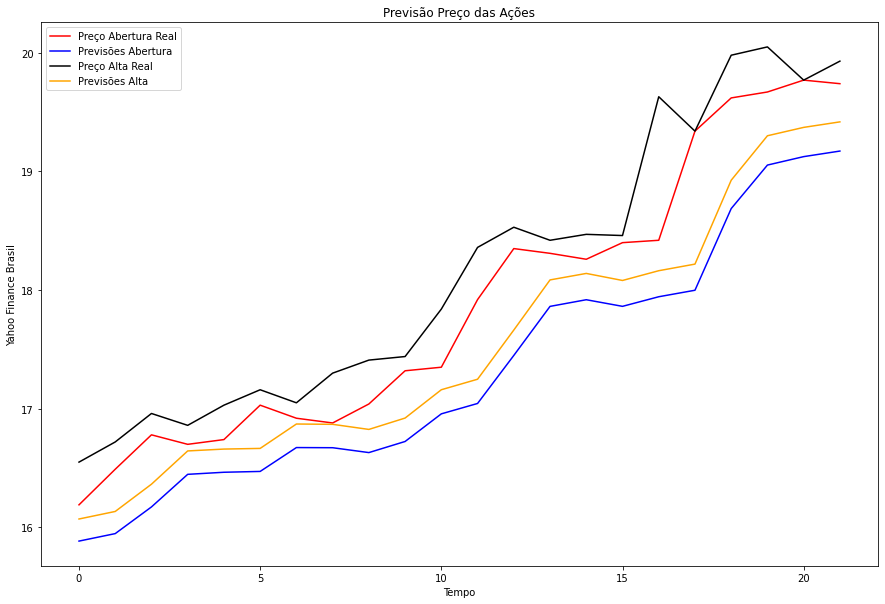

In [56]:
plt.figure(figsize=(15, 10));
plt.plot(preco_real_open, color = 'red', label = 'Preço Abertura Real');
plt.plot(previsoes[:, 0], color = 'blue', label = 'Previsões Abertura');

plt.plot(preco_real_high, color = 'black', label = 'Preço Alta Real');
plt.plot(previsoes[:, 1], color = 'orange', label = 'Previsões Alta');

plt.title('Previsão Preço das Ações');
plt.xlabel('Tempo');
plt.ylabel('Yahoo Finance Brasil');
plt.legend();
plt.show();